In [1]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import google_conf

In [2]:
# point out to your google service account and a google sheet URL to which you wish to send your data
theos_data = google_conf.setup(sheet_url="https://docs.google.com/spreadsheets/d/19gfECdrg5rDiU2PhNYL1nKifeKzemCfYtYrAHQX5vXE/edit?usp=sharing", service_account_path="../../ServiceAccountsKey.json")

In [3]:
# global parameters for plots
#plt.style.use("fast")
plt.style.use("seaborn-v0_8-white")
plt.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

def save_figure(fig, fig_name):
    #each figure to be saved in four different versions
    fig.savefig("../figures/" + fig_name + ".tiff")
    fig.savefig("../figures/" + fig_name + ".png")

In [4]:
LAGT = pd.read_parquet("../data/large_data/LAGT_theos.parquet")

In [5]:
centuries = [(str(int(n / -100)) + "BC",  n, n+ 99) for n in range(-800, 0, 100)] + [(str(int(n / 100)) + "CE",  n - 99, n) for n in range(100, 700, 100)]
centuries

[('8BC', -800, -701),
 ('7BC', -700, -601),
 ('6BC', -600, -501),
 ('5BC', -500, -401),
 ('4BC', -400, -301),
 ('3BC', -300, -201),
 ('2BC', -200, -101),
 ('1BC', -100, -1),
 ('1CE', 1, 100),
 ('2CE', 101, 200),
 ('3CE', 201, 300),
 ('4CE', 301, 400),
 ('5CE', 401, 500),
 ('6CE', 501, 600)]

In [6]:
religion_final = ["θεός", "Ζεύς", "εὐσεβής", 'ἱερός']
morality_final = ["ἀγαθός", "ἀρετή", "δίκαιος", "τιμή"]

In [7]:
centuries_targets = []
for cent in centuries:
    century_data = {}
    century_data["cent"] = cent
    LAGT_subset = LAGT[LAGT["cents"].apply(lambda x: cent[0] in x)]
    works_lemmata = LAGT_subset["lemmatized_sentences"].apply(lambda x: [l for s in x for l in s])
    subset_lemmata = [l for work in works_lemmata for l in work]
    subset_wordcount = LAGT_subset["wordcount"].sum()
    for target in religion_final + morality_final:
        target_n = subset_lemmata.count(target)
        century_data[target + "_n"] = target_n
        century_data[target + "_freq"] = target_n / subset_wordcount
    centuries_targets.append(century_data)

centuries_targets_df = pd.DataFrame(centuries_targets)
centuries_targets_df

,cent,θεός_n,θεός_freq,Ζεύς_n,Ζεύς_freq,εὐσεβής_n,εὐσεβής_freq,ἱερός_n,ἱερός_freq,ἀγαθός_n,ἀγαθός_freq,ἀρετή_n,ἀρετή_freq,δίκαιος_n,δίκαιος_freq,τιμή_n,τιμή_freq
0,"(8BC, -800, -701)",897,0.004117,850,0.003902,0,0.000000,100,0.000459,141,0.000647,41,0.000188,25,0.000115,59,0.000271
1,"(7BC, -700, -601)",185,0.006708,212,0.007688,0,0.000000,26,0.000943,22,0.000798,4,0.000145,11,0.000399,34,0.001233
2,"(6BC, -600, -501)",570,0.004711,450,0.003719,12,0.000099,33,0.000273,117,0.000967,68,0.000562,56,0.000463,74,0.000612
3,"(5BC, -500, -401)",4590,0.002015,2249,0.000987,94,0.000041,846,0.000371,5919,0.002598,1205,0.000529,1900,0.000834,497,0.000218
4,"(4BC, -400, -301)",3591,0.001043,1784,0.000518,61,0.000018,616,0.000179,8606,0.002499,2148,0.000624,3110,0.000903,716,0.000208
5,"(3BC, -300, -201)",4662,0.002082,357,0.000159,40,0.000018,266,0.000119,1428,0.000638,498,0.000222,686,0.000306,213,0.000095
6,"(2BC, -200, -101)",4519,0.003012,96,0.000064,42,0.000028,179,0.000119,802,0.000535,108,0.000072,591,0.000394,180,0.000120
7,"(1BC, -100, -1)",5062,0.002734,548,0.000296,83,0.000045,1226,0.000662,2911,0.001572,1793,0.000969,918,0.000496,795,0.000429
8,"(1CE, 1, 100)",11581,0.002651,1112,0.000255,138,0.000032,1888,0.000432,5564,0.001274,2525,0.000578,1792,0.000410,1698,0.000389
9,"(2CE, 101, 200)",22374,0.001895,4295,0.000364,244,0.000021,2408,0.000204,15968,0.001353,4000,0.000339,3749,0.000318,1979,0.000168


In [8]:
centuries_targets_df["cents_mid"] = centuries_targets_df["cent"].apply(lambda x: int((x[1] + x[2]) / 2))
centuries_targets_df.set_index("cents_mid", inplace=True)
centuries_targets_df["cent_label"] = centuries_targets_df["cent"].apply(lambda x: x[0])
centuries_targets_df

,cent,θεός_n,θεός_freq,Ζεύς_n,Ζεύς_freq,εὐσεβής_n,εὐσεβής_freq,ἱερός_n,ἱερός_freq,ἀγαθός_n,ἀγαθός_freq,ἀρετή_n,ἀρετή_freq,δίκαιος_n,δίκαιος_freq,τιμή_n,τιμή_freq,cent_label
cents_mid,,,,,,,,,,,,,,,,,,
-750,"(8BC, -800, -701)",897,0.004117,850,0.003902,0,0.000000,100,0.000459,141,0.000647,41,0.000188,25,0.000115,59,0.000271,8BC
-650,"(7BC, -700, -601)",185,0.006708,212,0.007688,0,0.000000,26,0.000943,22,0.000798,4,0.000145,11,0.000399,34,0.001233,7BC
-550,"(6BC, -600, -501)",570,0.004711,450,0.003719,12,0.000099,33,0.000273,117,0.000967,68,0.000562,56,0.000463,74,0.000612,6BC
-450,"(5BC, -500, -401)",4590,0.002015,2249,0.000987,94,0.000041,846,0.000371,5919,0.002598,1205,0.000529,1900,0.000834,497,0.000218,5BC
-350,"(4BC, -400, -301)",3591,0.001043,1784,0.000518,61,0.000018,616,0.000179,8606,0.002499,2148,0.000624,3110,0.000903,716,0.000208,4BC
-250,"(3BC, -300, -201)",4662,0.002082,357,0.000159,40,0.000018,266,0.000119,1428,0.000638,498,0.000222,686,0.000306,213,0.000095,3BC
-150,"(2BC, -200, -101)",4519,0.003012,96,0.000064,42,0.000028,179,0.000119,802,0.000535,108,0.000072,591,0.000394,180,0.000120,2BC
-50,"(1BC, -100, -1)",5062,0.002734,548,0.000296,83,0.000045,1226,0.000662,2911,0.001572,1793,0.000969,918,0.000496,795,0.000429,1BC
50,"(1CE, 1, 100)",11581,0.002651,1112,0.000255,138,0.000032,1888,0.000432,5564,0.001274,2525,0.000578,1792,0.000410,1698,0.000389,1CE


In [9]:
centuries_targets_df

,cent,θεός_n,θεός_freq,Ζεύς_n,Ζεύς_freq,εὐσεβής_n,εὐσεβής_freq,ἱερός_n,ἱερός_freq,ἀγαθός_n,ἀγαθός_freq,ἀρετή_n,ἀρετή_freq,δίκαιος_n,δίκαιος_freq,τιμή_n,τιμή_freq,cent_label
cents_mid,,,,,,,,,,,,,,,,,,
-750,"(8BC, -800, -701)",897,0.004117,850,0.003902,0,0.000000,100,0.000459,141,0.000647,41,0.000188,25,0.000115,59,0.000271,8BC
-650,"(7BC, -700, -601)",185,0.006708,212,0.007688,0,0.000000,26,0.000943,22,0.000798,4,0.000145,11,0.000399,34,0.001233,7BC
-550,"(6BC, -600, -501)",570,0.004711,450,0.003719,12,0.000099,33,0.000273,117,0.000967,68,0.000562,56,0.000463,74,0.000612,6BC
-450,"(5BC, -500, -401)",4590,0.002015,2249,0.000987,94,0.000041,846,0.000371,5919,0.002598,1205,0.000529,1900,0.000834,497,0.000218,5BC
-350,"(4BC, -400, -301)",3591,0.001043,1784,0.000518,61,0.000018,616,0.000179,8606,0.002499,2148,0.000624,3110,0.000903,716,0.000208,4BC
-250,"(3BC, -300, -201)",4662,0.002082,357,0.000159,40,0.000018,266,0.000119,1428,0.000638,498,0.000222,686,0.000306,213,0.000095,3BC
-150,"(2BC, -200, -101)",4519,0.003012,96,0.000064,42,0.000028,179,0.000119,802,0.000535,108,0.000072,591,0.000394,180,0.000120,2BC
-50,"(1BC, -100, -1)",5062,0.002734,548,0.000296,83,0.000045,1226,0.000662,2911,0.001572,1793,0.000969,918,0.000496,795,0.000429,1BC
50,"(1CE, 1, 100)",11581,0.002651,1112,0.000255,138,0.000032,1888,0.000432,5564,0.001274,2525,0.000578,1792,0.000410,1698,0.000389,1CE


In [10]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("centuries_targets", 1,1), centuries_targets_df)

In [11]:
colors_list = ["olive"] * 4 + ["chocolate"] * 4

In [12]:
colors = ["darkblue", "darkgreen", "darkred"]
periods_colors = ['lightcyan',
                  'lightgoldenrodyellow',
                  'lavender',
                  'lightgreen',
                  'lightpink']
periods_dict = {  # to avoid overlaps, startdates are postponed by one year, when needed
    "archaic": {"startdate": -800, "enddate": -501},
    "classical": {"startdate": -500, "enddate": -301},
    "hellenistic": {"startdate": -300, "enddate": 0},
    "roman_peak": {"startdate": 1, "enddate": 200},
    "roman_late": {"startdate": 201, "enddate": 600}}

Text(-0.02, 0.5, 'word frequency')

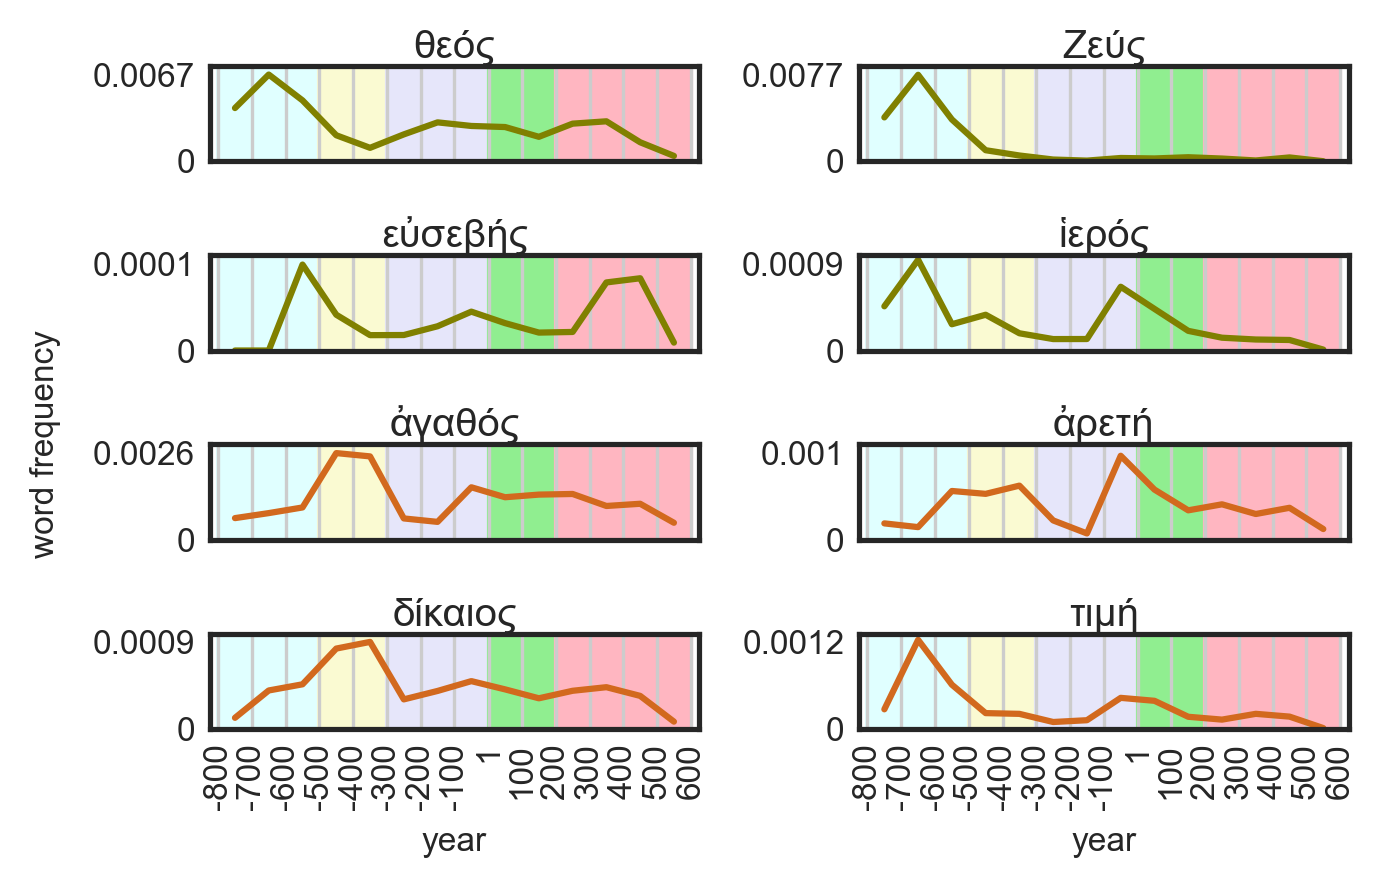

In [13]:
fig, axs = plt.subplots(4,2, figsize=(4.45, 3), tight_layout=True)

for target, ax, color in zip(religion_final + morality_final, axs.ravel(), colors_list):
    for period, color_per in zip(periods_dict.keys(), periods_colors):
        ax.axvspan(periods_dict[period]["startdate"], periods_dict[period]["enddate"], color=color_per, zorder=-1)
    #midpoint = (periods_dict[period]["startdate"] + periods_dict[period]["enddate"]) / 2  # calculate midpoint for label
    #ax.annotate(period, (midpoint, ax.get_ylim()[1] * 0.95), xytext=(0, 10),
    #            textcoords='offset points', ha='center', va='bottom', rotation=90)
    centuries_targets_df[target + "_freq"].plot(ax=ax, color=color)
    y_max = centuries_targets_df[target + "_freq"].max().round(4)
    ax.set_ylim(0, y_max * 1.1)
    ax.set_yticks([int(0), y_max])
    ax.set_yticklabels([str(tick) for tick in [int(0), y_max]])
    ax.set_xlabel("")
    ax.set_xticklabels([])
    #ax.grid(visible=True, axis="y")
    ax.grid(visible=True, axis="x")
    ax.set_title(target, pad=0)
    ax.set_xticks([el+1 if el==0 else el for el in range(-800,700,100)])
    ax.set_xlim(-825,625)


axs[3,0].set_xticklabels([str(el+1) if el==0 else str(el) for el in range(-800,700,100)], rotation=90)
axs[3,1].set_xticklabels([str(el+1) if el==0 else str(el) for el in range(-800,700,100)], rotation=90)

axs[3,0].set_xlabel("year")
axs[3,1].set_xlabel("year")

fig.text(-0.02, 0.5, 'word frequency', va='center', rotation='vertical')

In [14]:
save_figure(fig, "word_frequencies")

In [15]:
centuries_provenience_targets = []
for cent in centuries:
    century_data = {}
    century_data["cent"] = cent
    for provenience in ["pagan", "christian", "jewish"]:
        LAGT_subset = LAGT[(LAGT["cents"].apply(lambda x: cent[0] in x)) & (LAGT["provenience"]==provenience)]
        works_lemmata = LAGT_subset["lemmatized_sentences"].apply(lambda x: [l for s in x for l in s])
        subset_lemmata = [l for work in works_lemmata for l in work]
        subset_wordcount = LAGT_subset["wordcount"].sum()
        for target in religion_final + morality_final:
            target_n = subset_lemmata.count(target)
            century_data[target + "_" + provenience + "_n"] = target_n
            try:
                century_data[target + "_" + provenience + "_freq"] = target_n / subset_wordcount
            except:
                century_data[target + "_" + provenience + "_freq"] = 0
    centuries_provenience_targets.append(century_data)

centuries_provenience_targets_df = pd.DataFrame(centuries_provenience_targets)
centuries_provenience_targets_df

/var/folders/57/tg7c_g894t5c2z3swkqzds5h0000gn/T/ipykernel_34113/847871853.py:14: RuntimeWarning: invalid value encountered in scalar divide
  century_data[target + "_" + provenience + "_freq"] = target_n / subset_wordcount


,cent,θεός_pagan_n,θεός_pagan_freq,Ζεύς_pagan_n,Ζεύς_pagan_freq,εὐσεβής_pagan_n,εὐσεβής_pagan_freq,ἱερός_pagan_n,ἱερός_pagan_freq,ἀγαθός_pagan_n,...,ἱερός_jewish_n,ἱερός_jewish_freq,ἀγαθός_jewish_n,ἀγαθός_jewish_freq,ἀρετή_jewish_n,ἀρετή_jewish_freq,δίκαιος_jewish_n,δίκαιος_jewish_freq,τιμή_jewish_n,τιμή_jewish_freq
0,"(8BC, -800, -701)",897,0.004117,850,0.003902,0,0.000000,100,0.000459,141,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,"(7BC, -700, -601)",185,0.006708,212,0.007688,0,0.000000,26,0.000943,22,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,"(6BC, -600, -501)",570,0.004711,450,0.003719,12,0.000099,33,0.000273,117,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,"(5BC, -500, -401)",4590,0.002017,2249,0.000988,94,0.000041,846,0.000372,5905,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,"(4BC, -400, -301)",3588,0.001043,1784,0.000518,61,0.000018,616,0.000179,8600,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
5,"(3BC, -300, -201)",805,0.000590,355,0.000260,7,0.000005,160,0.000117,935,...,106,0.000122,487,0.000558,32,0.000037,415,0.000476,77,0.000088
6,"(2BC, -200, -101)",664,0.001057,94,0.000150,9,0.000014,73,0.000116,315,...,106,0.000122,487,0.000558,32,0.000037,415,0.000476,77,0.000088
7,"(1BC, -100, -1)",1987,0.001787,530,0.000477,57,0.000051,924,0.000831,1551,...,302,0.000410,1358,0.001842,958,0.001299,307,0.000416,314,0.000426
8,"(1CE, 1, 100)",3766,0.001333,1034,0.000366,53,0.000019,1015,0.000359,3177,...,790,0.000651,1879,0.001549,1248,0.001029,612,0.000505,682,0.000562
9,"(2CE, 101, 200)",8743,0.000881,3860,0.000389,154,0.000016,2231,0.000225,13518,...,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [31]:
centuries_provenience_targets_df[['cent', 'ἀρετή_pagan_freq', 'ἀρετή_christian_freq', 'ἀρετή_jewish_freq']]

,cent,ἀρετή_pagan_freq,ἀρετή_christian_freq,ἀρετή_jewish_freq
cents_mid,,,,
-750,"(8BC, -800, -701)",0.000188,NaN,NaN
-650,"(7BC, -700, -601)",0.000145,NaN,NaN
-550,"(6BC, -600, -501)",0.000562,NaN,NaN
-450,"(5BC, -500, -401)",0.000527,NaN,NaN
-350,"(4BC, -400, -301)",0.000624,NaN,NaN
-250,"(3BC, -300, -201)",0.000340,NaN,0.000037
-150,"(2BC, -200, -101)",0.000119,NaN,0.000037
-50,"(1BC, -100, -1)",0.000750,NaN,0.001299
50,"(1CE, 1, 100)",0.000446,0.000052,0.001029


In [17]:
centuries_provenience_targets_df["cents_mid"] = centuries_provenience_targets_df["cent"].apply(lambda x: int((x[1] + x[2]) / 2))
centuries_provenience_targets_df.set_index("cents_mid", inplace=True)
centuries_provenience_targets_df["cent_label"] = centuries_provenience_targets_df["cent"].apply(lambda x: x[0])

Text(-0.02, 0.5, 'word frequency')

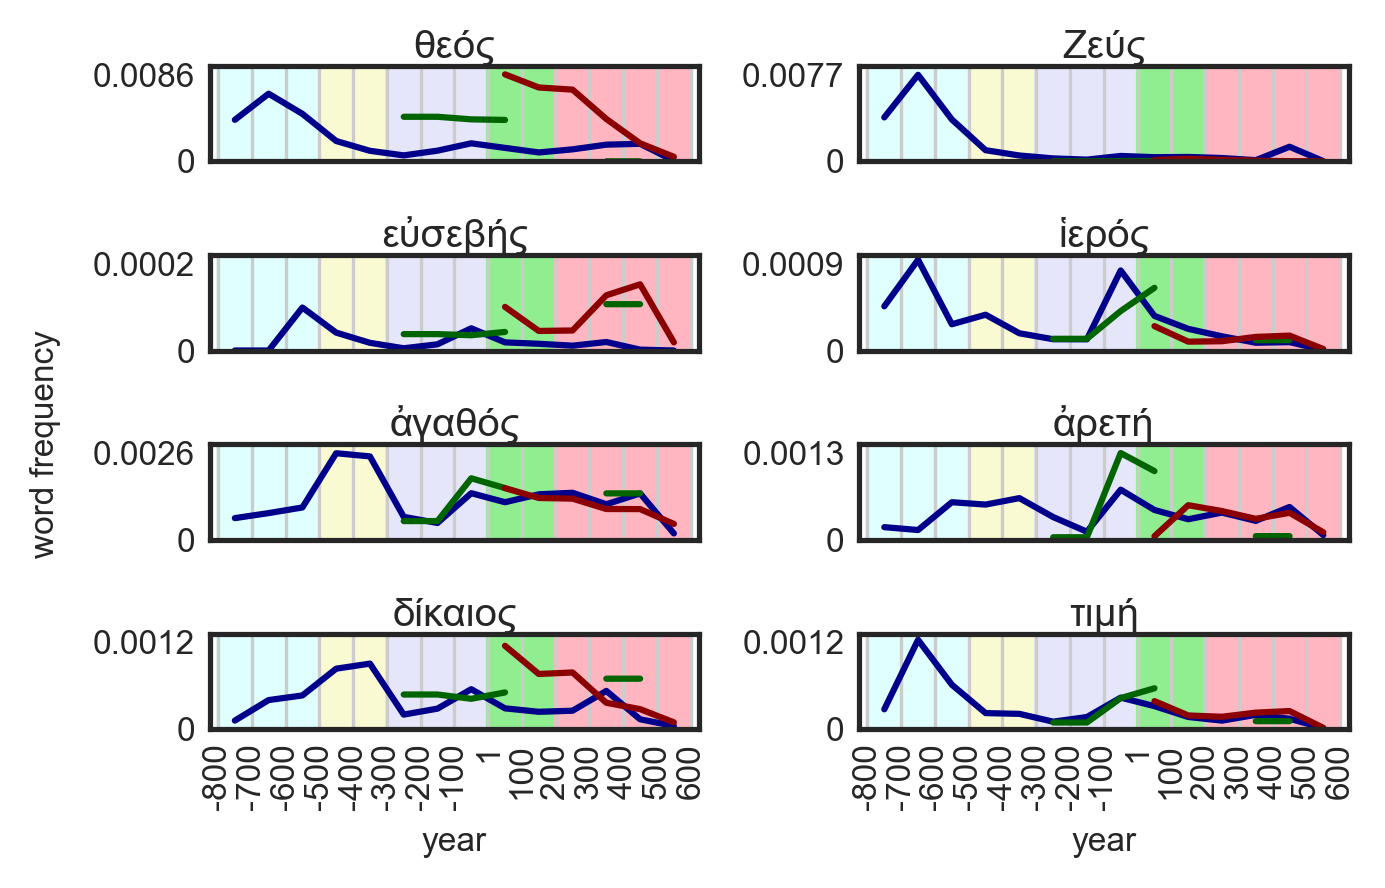

In [18]:
fig, axs = plt.subplots(4,2, figsize=(4.45, 3), tight_layout=True)

for target, ax, color in zip(religion_final + morality_final, axs.ravel(), colors_list):
    for period, color_per in zip(periods_dict.keys(), periods_colors):
        ax.axvspan(periods_dict[period]["startdate"], periods_dict[period]["enddate"], color=color_per, zorder=-1)
    #midpoint = (periods_dict[period]["startdate"] + periods_dict[period]["enddate"]) / 2  # calculate midpoint for label
    #ax.annotate(period, (midpoint, ax.get_ylim()[1] * 0.95), xytext=(0, 10),
    #            textcoords='offset points', ha='center', va='bottom', rotation=90)
    y_maxes = []
    for provenience, prov_color in zip(["pagan", "jewish", "christian"], ["darkblue", "darkgreen", "darkred"]):
        centuries_provenience_targets_df[target + "_" + provenience + "_freq"].plot(ax=ax, color=prov_color)
        y_maxes.append(centuries_provenience_targets_df[target + "_" + provenience + "_freq"].max().round(4))
    y_max = max(y_maxes)
    ax.set_ylim(0, y_max * 1.1)
    ax.set_yticks([int(0), y_max])
    ax.set_yticklabels([str(tick) for tick in [int(0), y_max]])
    ax.set_xlabel("")
    ax.set_xticklabels([])
    #ax.grid(visible=True, axis="y")
    ax.grid(visible=True, axis="x")
    ax.set_title(target, pad=0)
    ax.set_xticks([el+1 if el==0 else el for el in range(-800,700,100)])
    ax.set_xlim(-825,625)


axs[3,0].set_xticklabels([str(el+1) if el==0 else str(el) for el in range(-800,700,100)], rotation=90)
axs[3,1].set_xticklabels([str(el+1) if el==0 else str(el) for el in range(-800,700,100)], rotation=90)

axs[3,0].set_xlabel("year")
axs[3,1].set_xlabel("year")

fig.text(-0.02, 0.5, 'word frequency', va='center', rotation='vertical')

In [19]:
save_figure(fig, "word_frequencies_provenieces")

In [20]:
def freq_in_sents(row, target):
    try:
        target_n = [l for sent in row["lemmatized_sentences"] for l in sent].count(target)
        wordcount = row["wordcount"]
        target_freq = target_n # / wordcount
    except:
        target_n = 0
        target_freq = 0
    return target_n 
    
for target in religion_final + morality_final:
    LAGT[target + "_n"] = LAGT.apply(lambda row: freq_in_sents(row, target), axis=1)

In [21]:
for target in religion_final + morality_final:
    LAGT[target + "_freq"] = LAGT[target + "_n"] / LAGT["wordcount"]

In [35]:
LAGT[(LAGT["provenience"]=="jewish")  & (LAGT["cents"].apply(lambda x: "1BC" in x))][morality_final[1] + "_n"].sum() / LAGT[(LAGT["provenience"]=="jewish")  & (LAGT["cents"].apply(lambda x: "1BC" in x))]["wordcount"].sum()

0.0012994640728025426

In [36]:
LAGT[(LAGT["provenience"]=="pagan") & (LAGT["cents"].apply(lambda x: "1BC" in x))][morality_final[1] + "_freq"].mean()

0.0009306669047229427

In [37]:
LAGT[LAGT["author_id"]=="tlg0018"][morality_final[1] + "_freq"].mean()

0.0013873118134582088

In [43]:
LAGT[(LAGT["cents"].apply(lambda x: "1BC" in x)) & (LAGT["provenience"] != "jewish")].head(5)

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,...,δίκαιος_n,τιμή_n,θεός_freq,Ζεύς_freq,εὐσεβής_freq,ἱερός_freq,ἀγαθός_freq,ἀρετή_freq,δίκαιος_freq,τιμή_freq
78,tlg0037,tlg0037.tlg001,tlg0037.tlg001.1st1K-grc1.xml,Anacharsis,Epistulae,"Γελᾶτε ἐμὴν φωνήν, διότι οὐ τρανῶς ἑλληνικὰ γρ...",1327,1Kgr,"[[Γελάω, ἐμός, φωνή], [ἑλληνικός, γράμμα, λέγω...",grecy,...,1,1,0.005275,0.000000,0.000000,0.000000,0.006029,0.000000,0.000754,0.000754
79,tlg0039,tlg0039.tlg001,tlg0039.tlg001.1st1K-grc1.xml,Mithridatis Epistula,Epistula,"Τὰς Βρούτου ἐθαύμασα πολλάκις ἐπιστολάς, οὐ μ...",330,1Kgr,"[[Βρούτης, θαυμάζω, ἐπιστολή, μόνος, δεινότης,...",grecy,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
202,tlg0068,tlg0068.tlg001,tlg0068.tlg001.1st1K-grc1.xml,Pseudo-Scymnus,"Scymni Chii, ut fertur, Periegesis","Πάντων ἀναγκαιότατον ἡ κωμῳδία, θειότατε βασιλ...",5593,1Kgr,"[[πᾶς, ἀναγκαῖος, κωμῳδία, θειότατε, βασιλεύς,...",grecy,...,1,1,0.000179,0.000536,0.000358,0.000000,0.000179,0.000000,0.000179,0.000179
204,tlg0070,tlg0070.tlg001,tlg0070.tlg001.1st1K-grc1.xml,Isidore of Charax,Mansiones Parthicae,"1. Διαβάντων τὸν Εὐφράτην κατὰ Ζεῦγμα, πόλις ...",1187,1Kgr,"[[Διαβάντωνς, Εὐφράτης, Ζεῦγμα, πόλις, Ἀπάμεια...",grecy,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
209,tlg0081,tlg0081.tlg013,tlg0081.tlg013.1st1K-grc1.xml,Dionysius of Halicarnassus,De compositione verborum (epitome),"\nΔῶρόν τοι καὶ ἐγώ, τέκνον φίλε\n Ῥο...",9661,1Kgr,"[[Δῶρος, τέκνον, φίλος, Ῥοῦφε, Μελίτιος, οὗτος...",grecy,...,0,0,0.000207,0.000311,0.000000,0.000104,0.000725,0.000207,0.000000,0.000000


In [44]:
# to check first century BCE works with highest arete freqs:
google_conf.set_with_dataframe(theos_data.add_worksheet("LAGT_top_arete_1BC", 1,1), LAGT[(LAGT["cents"].apply(lambda x: "1BC" in x)) & (LAGT["provenience"] != "jewish")].sort_values(morality_final[1] + "_freq", ascending=False).drop(["string", "lemmatized_sentences"], axis=1).head(50))

## For manual check of proveniences

In [60]:
def get_period(row):
    not_before = row["not_before"]
    not_after = row["not_after"]
    if 200 >= not_before and not_after >= -200:
        return True
    else:
        return False

In [61]:
period_subset = LAGT[(LAGT.apply(lambda row: get_period(row), axis=1)) & (LAGT["provenience"] != "jewish") & (LAGT["provenience"] != "christian")]
period_subset.head(5)

,author_id,doc_id,filename,author,title,string,wordcount,source,lemmatized_sentences,lemmata_source,...,δίκαιος_n,τιμή_n,θεός_freq,Ζεύς_freq,εὐσεβής_freq,ἱερός_freq,ἀγαθός_freq,ἀρετή_freq,δίκαιος_freq,τιμή_freq
10,tlg0007,tlg0007.tlg146,tlg0007.tlg146.1st1K-grc1.xml,Plutarch,Παροιμίαι αἷς Ἀλεξανδρεῖς ἐχρῶντο,Οἴκοι τὰ Μιλήσια: ἐπὶ τῶν ὅποι μὴ προςήκει τὴν...,2685,1Kgr,"[[Μιλήσιος], [προςήκω, τρυφή, ἐπιδείκνυμι], [Ἀ...",grecy,...,0,1,0.002235,0.001117,0.000000,0.000745,0.001490,0.000000,0.000000,0.000372
11,tlg0007,tlg0007.tlg147,tlg0007.tlg147.1st1K-grc1.xml,Plutarch,Ἐκλογὴ περὶ τῶν ἀδυνάτων,Κατὰ πετρῶν σπείρεις. Πλίνθον πλύνεις. Δικτύῳ ...,143,1Kgr,"[[πέτρα, σπείρω], [Πλίνθος, πλύνω, Δίκτυον, ἄν...",grecy,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12,tlg0015,tlg0015.tlg001,tlg0015.tlg001.1st1K-grc1.xml,Herodian,Ab excessu divi Marci,\nΟἱ πλεῖστοι τῶν περὶ συγκομιδὴν ἱστορίας ἀσχ...,46751,1Kgr,"[[πολύς, συγκομιδή, ἱστορία, ἀσχολέω, ἔργον, γ...",glaux,...,4,66,0.001262,0.000235,0.000021,0.000364,0.000578,0.000235,0.000086,0.001412
75,tlg0022,tlg0022.tlg001,tlg0022.tlg001.1st1K-grc1.xml,Nicander of Colophon,Θηριακά,Ῥεῖά κέ τοι μορφάς τε σίνη τ’ ὀλοφώια θηρῶν ἀπ...,6378,1Kgr,"[[Ῥεῖά, μορφή, σίνη, ὀλοφώϊος, θήρ, ἀπροϊδῆζω,...",grecy,...,0,0,0.000000,0.000000,0.000000,0.000000,0.000157,0.000000,0.000000,0.000000
76,tlg0022,tlg0022.tlg002,tlg0022.tlg002.1st1K-grc1.xml,Nicander of Colophon,Αλεξιφάρμακα,Εἰ καὶ μὴ σύγκληρα κατ’ Ἀσίδα τείχεα δῆμοι τύρ...,4137,1Kgr,"[[σύγκληρος, Ἀσίς, τεῖχος, δῆμος, τύρσις, ἵστη...",grecy,...,0,0,0.000000,0.000483,0.000000,0.000242,0.000000,0.000000,0.000000,0.000000


In [62]:
period_unique = period_subset.drop_duplicates(subset='author_id', keep='first')
len(period_unique)

127

In [58]:
#google_conf.set_with_dataframe(theos_data.add_worksheet("lagt_200BCto20OCE", 1,1), period_unique.drop(["string", "lemmatized_sentences"], axis=1))